# Deutsch Algorithm

#### This cell is  used to define bras, kets, brackets for latex
$
\newcommand{\ket}[1]{\left|{#1}\right\rangle}
\newcommand{\bra}[1]{\left\langle{#1}\right|}
\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}
$

A Hadamard gate puts a single qubit into superposition

$$
H\ket{0} = \frac{1}{\sqrt{2}}(\ket{0}+\ket{1}) \equiv \ket{+}\\
H\ket{1} = \frac{1}{\sqrt{2}}(\ket{0}-\ket{1}) \equiv \ket{-}\\
$$

## Building a gate from a function

$$
\ket{x}\ket{y} \rightarrow \ket{x}\ket{y\oplus f(x)}
$$
    
    

In [1]:
from qiskit import QuantumCircuit

def deutsch_oracle(f):
    qc = QuantumCircuit(2)
    if f(0) == f(1): # constant
        if f(0) == 1:
            qc.x(0)
    else: #balanced
        if f(0) == 1:
            qc.x(0)
        qc.cx(0, 1)
    qc.name = "Deutsch Oracle" # To show when we display the circuit
    return qc

In [2]:
def deutsch_circuit(f):
    oracle = deutsch_oracle(f)
    qc = QuantumCircuit(2,1)
    qc.x(1)
    qc.barrier()
    qc.h(0)
    qc.h(1)
    qc.append(oracle, [0, 1])
    qc.h(0)
    qc.measure(0,0)
    return qc

In [3]:
def interpret_result(result):
    bit = int(list(result.keys())[0])
    return 'Constant' if bit==0 else 'Balanced'

In [4]:
from qiskit.providers.aer import AerSimulator
from qiskit import assemble, transpile

def simulate(circuit, shots=1000):
    aer_sim = AerSimulator()
    transpiled_circuit = transpile(circuit, aer_sim)
    job = aer_sim.run(transpiled_circuit, shots=shots)  # run the experiment
    result = job.result()  # get the results
    # interpret the results as a "counts" dictionary
    return result.get_counts()

In [5]:
# Define the possible functions

def b0(x):
    return 0

def b1(x):
    return 1

def identity(x):
    return x

def inverse(x):
    return 1-x


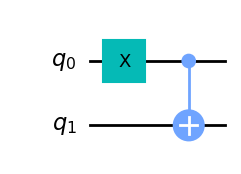

In [6]:
## visualize inverse

qc = deutsch_oracle(inverse)
qc.draw(output='mpl')

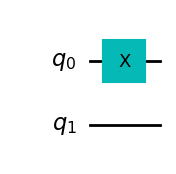

In [7]:
## visualize b1


qc = deutsch_oracle(b1)
qc.draw(output='mpl')

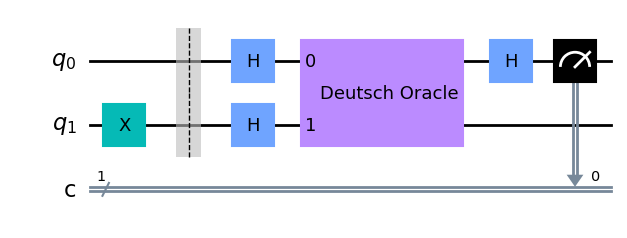

In [8]:
#example 

qc0 = deutsch_circuit(b0)
qc0.draw(output='mpl')

In [9]:
result0 = simulate(qc0)
result0
interpret_result(result0)

'Constant'

In [10]:
qc1 = deutsch_circuit(b1)
result1 = simulate(qc1)
interpret_result(result1)

'Constant'

In [11]:
qc2 = deutsch_circuit(identity)
result2 = simulate(qc2)
interpret_result(result2)

'Balanced'

In [12]:
qc3 = deutsch_circuit(inverse)
result3 = simulate(qc3)
interpret_result(result3)

'Balanced'